# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Team members background:

- __Amira Bendjama__: is an Algerian Fulbrighter with a bachelor’s in computer science, and a master’s in networks and distributed systems. Her skill set varies from different programming languages to problem-solving and critical thinking. She worked with Youtube API V3 to retrieve the dataset for [Valorant comments on Youtube](https://github.com/amira-bendjama/VALORANT-COMMENTS). 

- __Alsulami Meznah__: is a graduate student in Data Science. She majored in a bachelor's degree in Information Systems.  She has a good background in Java, Visual Basic, and SQL. She looks forward to improving my skills and learning more about Python and R.

- __Thuy Hong Doan__: graduated with a bachelor of business administration in Computer Information Systems. Her skill set varies from different programming languages to analytical and problem-solving skills. She worked with HTML, CSS, SQL, JavaScript, and Python. She plans to use her previous coding experience and understanding of data structure to help successfully complete this project.

### Growth area 

We are looking to take on a project that presents real-world data analysis challenges in order to align our skills with the type of work we would undertake in the professional world. Analyzing a dataset is particularly challenging because of the different steps to take before actually analyzing the dataset such as cleaning the dataset, and checking the correctness, and thus is a good way to learn about data analysis.

## Topic Summary 

YouTube is one of the leading video-sharing and social media platforms in the world. Thus, It had a huge impact on changing the marketing strategies through video promotion or sponsoring independent Youtubers, with its captivating features such as the recommendation page, and trending page. However, the latter doesn’t have a clear indication of what makes a Youtube video trending. Hence, the speculation on what makes a video trending such as [Researching The Trending Tab (BTS)](https://www.youtube.com/watch?v=sEvtpj-uChA&ab_channel=Coffeezilla), [What Is YouTube Trending And How It Works](https://www.notion.so/project-scooping-427deb3f9cbc4c32949c17248bdc0a30#04a09cb6fee248398f38d2fa43a72052). The goal of the project is to perform EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to attribute the factor that affects how popular a Youtube video will be. Those insights might be used by Youtube channels owned by traditional companies that seek to break into the new marketing field, or they can be used by individual Youtubers that seek to increase the popularity of their videos, without affecting their content creation. This project will rely on [dataset](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset) from Kaggle which was collected using the Youtube API.


## Term Project Phase 1: details 

__What is our selected dataset and why?__

The selected dataset is collected using Youtube API. It includes several months of data on daily trending YouTube videos, with up to 200 listed trending videos per day, for different regions. However, the project will focus on the United states' dataset, because of two factors: First, it is a majority English-speaking country, where English content is the most viewed and shared, and Second the USA is leading the trends in the platform and around the world. The dataset includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count, category.

__What is the availability of relevant pre-processed data?__

The dataset is available for the public on [Kaggle](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset). 

__What will the analysis do, and who/what it will support?__ 

The EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to find the factors. The questions we are trying to solve are: 
1. what are the top most trending Categories? 
2. what is the impact of Likes, Dislikes and Comments.
3. what are the most used words for titles, video descriptions, and tags?

__Who would be interested in the data analysis?__

- Advertiser to sponsor Youtube videos that have the potential to be trending
- Youtube channels owned by companies that want to keep up with the trends for better-performing product ads. 
- Independent Youtubers who want to make trending videos
- Researchers to derive insight into behavior from Youtube trends and marketing strategies

__How your analysis might be completed and disseminated?__

The analysis will be shared in Kaggle and GitHub for public use.

__How your analysis might fit into an application or investigation?__ 

This analysis enables YouTube to predict the lifecycle of popular content so that it can adapt its economic strategy. YouTubers, or content creators, get money from their videos as well. For many YouTubers, YouTube is their sole source of income, and this will assist producers in analyzing their content life cycle and making necessary modifications. Feedback from viewers, for example, is a crucial part for YouTubers because it allows them to understand how their material is being received by people and shows YouTube and YouTubers how interactive features affect the performance of their videos on social networks. Also, The analysis can be helpful across other social media platforms, such as Twitch, and Facebook gaming, where the latter relay heavily on capturing the attention of live viewers, which will be suitable to implement the same factors and techniques used in most popular video streaming platform. 


__Limitations__

- The dataset is limited to several months and only 200 videos per day, and hence it could add some bias to the predictions. 
- World events that are relevant to only several months can affect the prediction greatly in a small dataset.
- Absence of a duration column in the dataset, which is considered one of the factors to impact the trending videos.

__Potential solutions__ 

- The results can be improved by extending the data collection to a few years back, 
- Improving the prediction to ignore irrelevant events. 
- Adding the duration column to the dataset


### Potential Software used 
- Juypter notebook 

### Hardware used 
- Acer processor i5 RAM 8GB
- Hp processor i7 RAM 8GB
- Macbook Pro processor i5 RAM 8GB



# Exploratory Data Analysis 

Loading the data from the CSV file and into dataframe and retrieving the categories for a specific video, we must load a JSON file since this is how the dataset was structured.

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')




Number of elements in the dataset

In [4]:
US_category_id.shape , trending_youtube.shape

((32, 3), (180990, 16))

Columns in the dataset

In [5]:
trending_youtube.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

Some of the columns are redundant for our analysis so we will drop them

In [6]:
trending_youtube.drop(['video_id','thumbnail_link', 'description'], axis=1, inplace=True)

In [7]:
trending_youtube.shape

(180990, 13)

In [8]:
trending_youtube.dtypes

title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
dtype: object

In [9]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11T19:20:14Z,2020-08-12T00:00:00Z
1,2020-08-11T17:00:10Z,2020-08-12T00:00:00Z
2,2020-08-11T16:34:06Z,2020-08-12T00:00:00Z
3,2020-08-11T16:38:55Z,2020-08-12T00:00:00Z
4,2020-08-11T15:10:05Z,2020-08-12T00:00:00Z


In [10]:
#Trending date column has object data type which needs to changed as datetime
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")

In [11]:
#The publishedAt column converted with the astype function
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')

In [12]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14,2020-08-12
1,2020-08-11 17:00:10,2020-08-12
2,2020-08-11 16:34:06,2020-08-12
3,2020-08-11 16:38:55,2020-08-12
4,2020-08-11 15:10:05,2020-08-12


In [13]:
trending_youtube[['trending_date','publishedAt']].dtypes


trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

In [14]:
# create time_diff colume to calculate the difference between the time a video is published and its trending time
trending_youtube['time_diff'] = trending_youtube['trending_date'] - trending_youtube['publishedAt']
trending_youtube['time_diff'].head()

0   0 days 04:39:46
1   0 days 06:59:50
2   0 days 07:25:54
3   0 days 07:21:05
4   0 days 08:49:55
Name: time_diff, dtype: timedelta64[ns]

In [15]:
trending_youtube.channelTitle.nunique() #check the number of unique channels.

7072

In [16]:
# convert time_diff to a numerical variable to plot its distribution
#convert it to hours
trending_youtube['time_diff_hour'] = trending_youtube['time_diff'] / pd.Timedelta('1 hour')

In [17]:
trending_youtube['time_diff_hour'].mean()

81.57050923469019

In [18]:
trending_youtube['time_diff_hour'].median()


77.20902777777778

In [19]:
trending_youtube['time_diff_hour'].std()

56.2786990149909

In [20]:
#take the mean and divide by 24
trending_youtube['time_diff_hour'].mean() / 24

3.3987712181120915

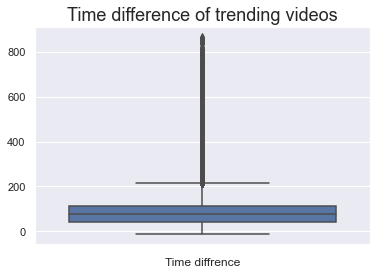

In [21]:
#use a box plot for visualization to give us an overview of the distribution
a = sns.boxplot(data=trending_youtube, y='time_diff_hour')
a.set(xlabel='Time diffrence', ylabel='')
_ = plt.title("Time difference of trending videos", fontsize = 18)

Eliminate the outliers

In [22]:
len(trending_youtube)

180990

In [23]:
len(trending_youtube[trending_youtube.time_diff_hour > 600])

193

In [24]:
len(trending_youtube[trending_youtube.time_diff_hour <= 600])

180797

compare the average views of trending videos published by these channels

In [25]:
#compare the average views of trending videos published by these channels
trending_youtube['views_mil'] = trending_youtube['view_count'] / 1000000
trending_youtube[['channelId','views_mil']].groupby('channelId')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                               mean count
channelId                                
UCDVYQ4Zhbm3S2dlz7P1GBDg   3.820689  1228
UCWJ2lWNubArHWmf3FIHbfcQ   2.189698  1074
UCpB959t8iPrxQWj7G6n0ctQ   4.799959   596
UCqZQlzSHbVJrwrn5XvzrzcA   1.231949   543
UCIPPMRA040LQr5QPyJEbmXA  10.070149   512
UCke6I9N4KfC968-yRcd5YRg   3.814751   492
UCRijo3ddMTht_IHyNSNXpNQ   7.361311   489
UCET00YnetHT7tOpu12v8jxg   1.122511   488
UCqFzWxSCi39LnW1JKFR3efg   3.248411   486
UCX6OQ3DkcsbYNE6H8uQQuVA  30.323988   474

The number of trending videos changes over time

In [26]:
#The number of trending videos changes over time
daily = trending_youtube[['trending_date']].value_counts().reset_index()\
.sort_values(by='trending_date').reset_index(drop=True)

In [27]:
daily.head()

,trending_date,0
0,2020-08-12,200
1,2020-08-13,200
2,2020-08-14,200
3,2020-08-15,200
4,2020-08-16,200


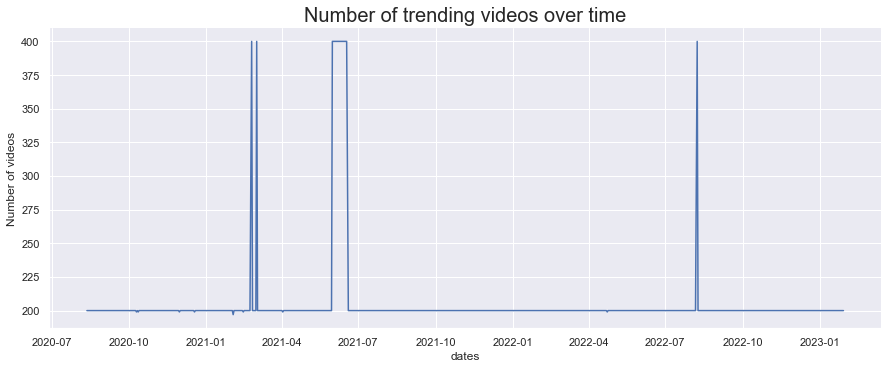

In [28]:
#Generate a line plot based over time
a = sns.relplot(data=daily, x='trending_date', y=0,
kind='line', aspect=2.5)
a.set( xlabel='dates', ylabel='Number of videos')
_ = plt.title("Number of trending videos over time", fontsize = 20)

#### What categories that youtube users in the US are interested in?

In [29]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [30]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)

In [31]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180990 entries, 0 to 180989
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   title              180990 non-null  object         
 1   publishedAt        180990 non-null  datetime64[ns] 
 2   channelId          180990 non-null  object         
 3   channelTitle       180990 non-null  object         
 4   categoryId         180990 non-null  int64          
 5   trending_date      180990 non-null  datetime64[ns] 
 6   tags               180990 non-null  object         
 7   view_count         180990 non-null  int64          
 8   likes              180990 non-null  int64          
 9   dislikes           180990 non-null  int64          
 10  comment_count      180990 non-null  int64          
 11  comments_disabled  180990 non-null  bool           
 12  ratings_disabled   180990 non-null  bool           
 13  time_diff          180990 non

In [32]:
#Groupby and sum view count, likes, dislikes, comment_count  by category 
lst = ['view_count','likes','dislikes','comment_count','category']
category_group = trending_youtube[lst].groupby('category').sum()
category_group


,view_count,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,3215645620,146890258,1408858,12308501
Comedy,16874950519,1162541307,11174623,57797099
Education,7883596987,438369415,4040488,25341680
Entertainment,111616817334,5479026698,62549431,334163346
Film & Animation,16730332730,727141429,6686643,51436522
Gaming,62919711086,3425458004,38395646,261000687
Howto & Style,6450455913,332634247,7266989,25001099
Music,130848937603,8623293550,106002834,962685521
News & Politics,15688337016,202447837,9979392,45007198


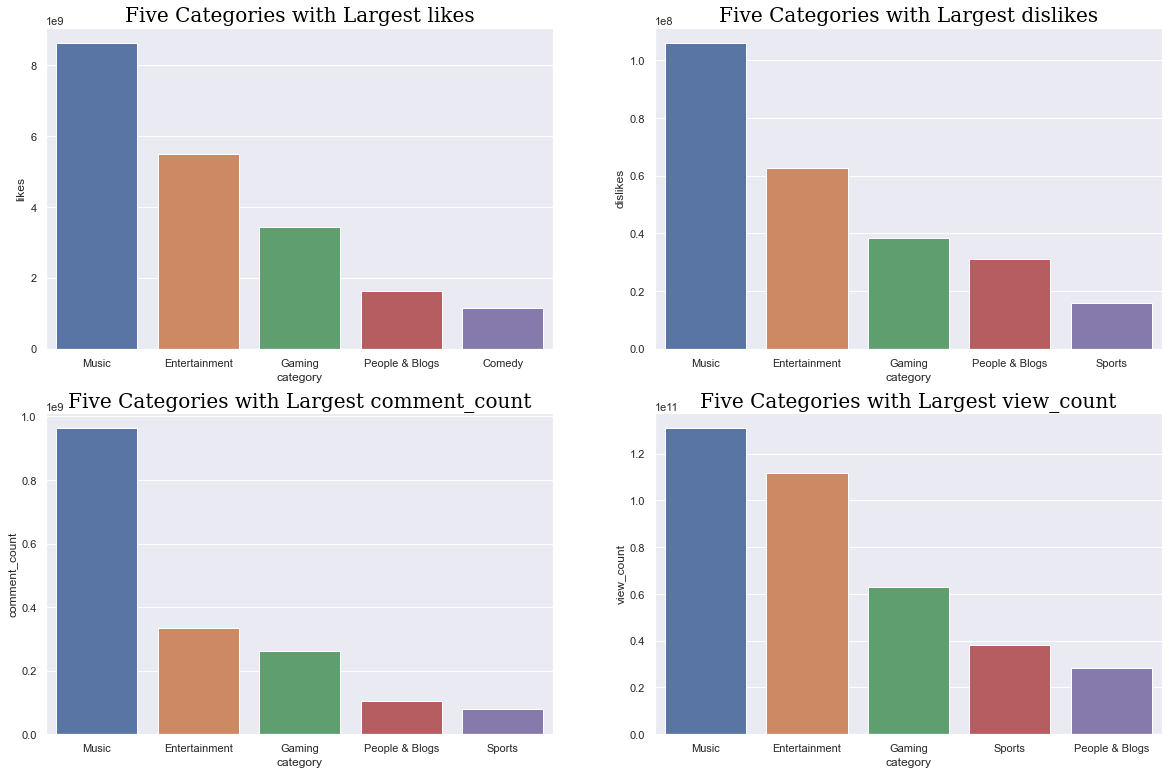

In [33]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','comment_count','view_count',]
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nlargest(5).index
    y = category_group[lst[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Largest " + lst[i]
    plt.title(title,font)

Based on the diagrams above, the categories that most youtube's users search for on Youtube are music, entertainment, gaming, people, and sports, respectively.

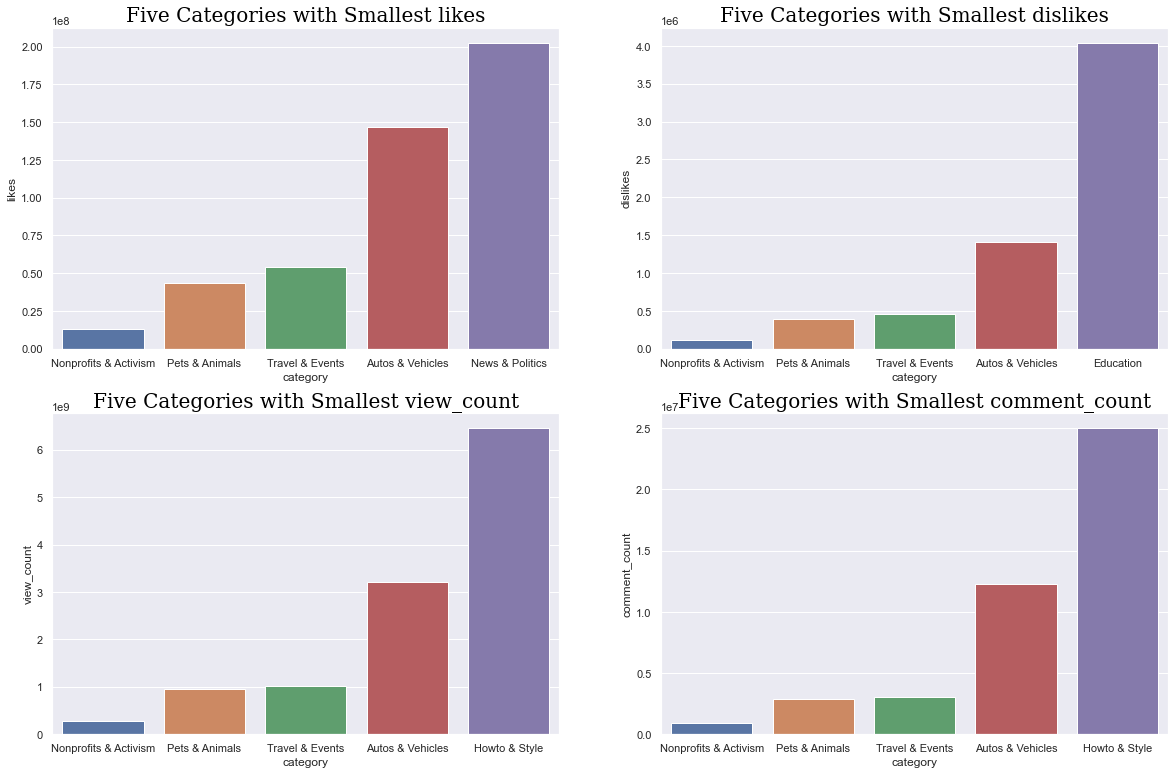

In [34]:
#Plotting the 5 categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','view_count','comment_count']
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nsmallest(5).index
    y = category_group[lst[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Smallest " + lst[i]
    plt.title(title,font)


Based on the diagrams above, youtube users are not interested much in the nonprofit, pet & animals, and travels category.

##### Time lag analysis

 The time lag between when a video is published and when it first appears on the trending list, and identify any factors that may cause this delay

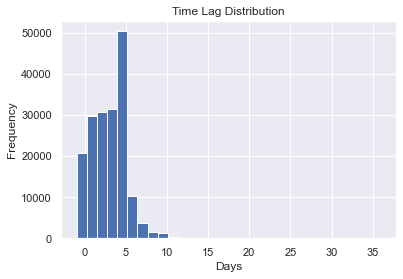


Factor: channelId
channelId
UCvmofFg-oZc4jvBUIfZbjzg    29.000000
UCxMMA6NjRPaVH52iGRe7VpA    28.500000
UCsmvyN1ioujLMALHNKVnsSA    24.000000
UCVZnJqm6IN89xK359XiXmIw    19.166667
UCWEtnEiVwUy7mwFeshyAWLA    18.000000
UCMmvhaKpOxeyneANESIYXcA    16.500000
UC9M7-jzdU8CVrQo1JwmIdWA    16.000000
UCSFOWOgB_s52kkhzRaCS2gQ    15.500000
UCMwUh33m0bYGxHa1aolqZ_w    15.400000
UCK8qVjkRMI1lRcYp6_W_1qw    15.000000
Name: time_lag, dtype: float64

Factor: categoryId
categoryId
29    5.017544
25    3.629408
24    3.129225
23    3.068726
15    3.056860
22    3.035105
10    3.034370
1     2.986652
26    2.920814
27    2.919881
Name: time_lag, dtype: float64

Factor: tags
tags
international women's day|what is international women's day|celebrating international women's day|feminism|feminist|women's day|history of feminism|suffrage|history of suffrage|women in Britain|women in history|women|educational videos|history|history for kids|primary school|school|classroom|resources|lessons|educational video|

In [35]:
# Create a new column for time lag between publishing and trending
trending_youtube['time_lag'] = (trending_youtube['trending_date'] - trending_youtube['publishedAt']).dt.days

# Plot time lag distribution
plt.hist(trending_youtube['time_lag'], bins=30)
plt.title('Time Lag Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Identify factors that may cause delays
delay_factors = ['channelId', 'categoryId', 'tags']
for factor in delay_factors:
    print('\nFactor:', factor)
    print(trending_youtube.groupby(factor)['time_lag'].mean().sort_values(ascending=False).head(10))

By understanding the factors that may cause delays in a video's appearance on the trending list, content creators and marketers can make more informed decisions about the topics, timing, and promotion strategies for their videos to maximize their chances of success on YouTube.

###### Time-of-day and day-of-week analysis

Calculate the average view count for videos published on different days of the week or at different times of day...

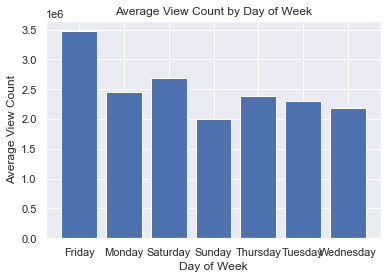

In [36]:
trending_youtube['hour'] = trending_youtube['publishedAt'].dt.hour
trending_youtube['day_of_week'] = trending_youtube['publishedAt'].dt.day_name()
# Group by day of week and calculate average view count
daily_view_count = trending_youtube.groupby('day_of_week')['view_count'].mean()

# Plot average view count by day of week
plt.bar(daily_view_count.index, daily_view_count.values)
plt.title('Average View Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average View Count')
plt.show()

Analyzing the time-of-day and day-of-week trends can help content creators and marketers make more informed decisions about when to publish their videos, how to promote them, and how to optimize their content to maximize their reach and engagement on YouTube.

##### Time difference between publication and trending by category

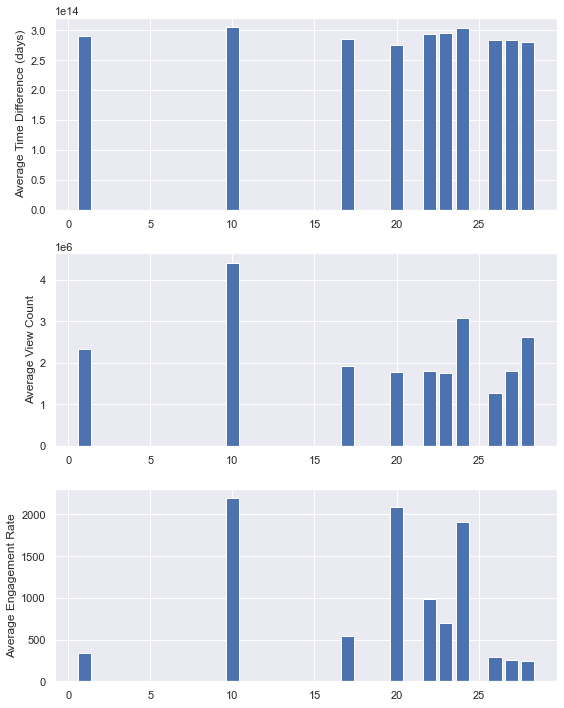

In [41]:
# Group the data by category and calculate the average time difference, view count, and engagement rate for each category
category_stats = trending_youtube.groupby('categoryId').agg({
    'time_diff': 'mean',
    'view_count': 'mean',
    'likes': 'sum',
    'dislikes': 'sum',
    'comment_count': 'sum'
})

# Calculate engagement rate as the sum of likes, dislikes, and comments divided by view count
category_stats['engagement_rate'] = (category_stats['likes'] + category_stats['dislikes'] + category_stats['comment_count']) / category_stats['view_count']

# Find the top 10 categories by engagement rate
top_categories = category_stats.sort_values('engagement_rate', ascending=False).head(10)

# Plot the average time difference, view count, and engagement rate for the top 10 categories
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
ax[0].bar(top_categories.index, top_categories['time_diff'])
ax[0].set_ylabel('Average Time Difference (days)')
ax[1].bar(top_categories.index, top_categories['view_count'])
ax[1].set_ylabel('Average View Count')
ax[2].bar(top_categories.index, top_categories['engagement_rate'])
ax[2].set_ylabel('Average Engagement Rate')
plt.tight_layout()
plt.show()

That helps identify patterns in how quickly videos become popular on the platform and any factors that may influence the speed of their rise to popularity. By analyzing the time difference between publication and trending for videos in different categories, the analysis can also help identify whether certain categories or topics tend to become popular more quickly or slowly, and can provide insights into the preferences and behavior of YouTube users. 